# Following Lab 3 from the book "An Introduction to Statistical Learning, with Applications in Python": Modeling Car Efficiency with Linear and Polynomial Regression in Python

In [ ]:
pip install --upgrade pip setuptools packaging wheel

In [ ]:
pip install ISLP

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS, summarize, poly
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.anova import anova_lm

## Using the dataset "Auto" from the ISLP package, provided in the book "An Introduction to Statistical Learning, with Applications in Python"

In [15]:
import ISLP
df = ISLP.load_data("Auto")

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [19]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [21]:
y = df["mpg"]
X1 = sm.add_constant(df["horsepower"])
model_lin = sm.OLS(y, X1).fit()
model_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        14:56:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model_lin.params

const         39.935861
horsepower    -0.157845
dtype: float64

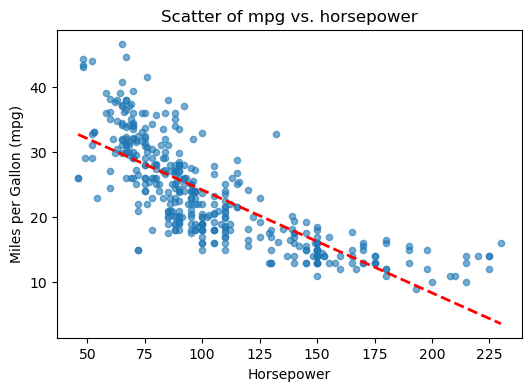

In [27]:
hp_vals = np.linspace(df["horsepower"].min(),
                      df["horsepower"].max(), 200)
mpg_vals = model_lin.params["const"] + model_lin.params["horsepower"] * hp_vals

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df["horsepower"], df["mpg"], s=20, alpha=0.6)
ax.plot(hp_vals, mpg_vals, "r--", lw=2)
ax.set_xlabel("Horsepower")
ax.set_ylabel("Miles per Gallon (mpg)")
ax.set_title("Scatter of mpg vs. horsepower")
plt.show()

In [29]:
y = df["mpg"]
X_lin = df[["horsepower", "weight", "acceleration", "displacement"]]          
X_lin = sm.add_constant(X_lin)                   
model_multi = sm.OLS(y, X_lin).fit()
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Sun, 29 Jun 2025   Prob (F-statistic):          9.63e-102
Time:                        14:56:42   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

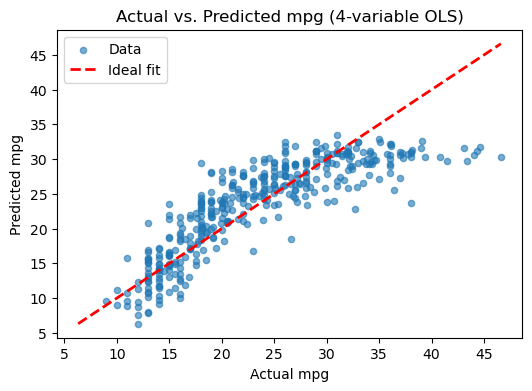

In [31]:
y_true  = df["mpg"]
y_pred  = model_multi.predict(X_lin)   # X_lin has const + horsepower, weight, acceleration, displacement

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_true, y_pred, s=20, alpha=0.6, label="Data")
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
ax.plot(lims, lims, 'r--', lw=2, label="Ideal fit")
ax.set_xlabel("Actual mpg")
ax.set_ylabel("Predicted mpg")
ax.set_title("Actual vs. Predicted mpg (4-variable OLS)")
ax.legend()
plt.show()

In [75]:
poly = PolynomialFeatures(degree=2, include_bias=False)
Xp = poly.fit_transform(df[["horsepower"]])
cols = poly.get_feature_names_out(["horsepower"])
Xp = pd.DataFrame(Xp, columns=cols, index=df.index)

Xp["weight"] = df["weight"]
Xp["acceleration"] = df["acceleration"]
Xp["displacement"] = df["displacement"]

Xp = sm.add_constant(Xp)
model_poly = sm.OLS(df["mpg"], Xp).fit()
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     233.3
Date:                Sun, 29 Jun 2025   Prob (F-statistic):          2.95e-114
Time:                        15:08:35   Log-Likelihood:                -1088.4
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     386   BIC:                             2213.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           65.3205      3.313     19.714      0.000      58.806      71.835
horsepower      -0.3797      0.043     -8.773      0.000      -0.465      -0.295
horsepower^2     0.0011      0.000      8.300      0.000       0.001       0.001
weight          -0.0015      0.001     -1.761      0.079      -0.003       0.000
acceleration    -0.4812      0.128     -3.750      0.000      -0.733      -0.229
displacement    -0.0189      0.006     -2.968      0.003      -0.031      -0.006
==============================================================================
Omnibus:                       36.460   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.676
Skew:                           0.619   Prob(JB):                     4.93e-13
Kurtosis:                       4.391   Cond. No.                     2.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

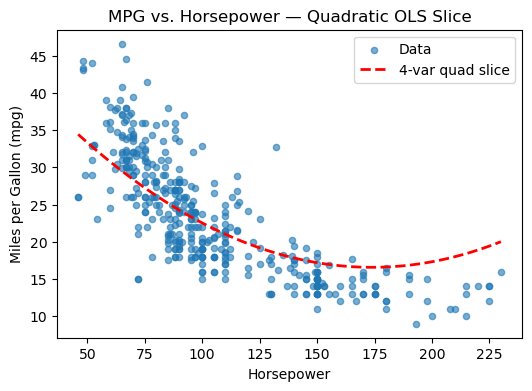

In [35]:
b0 = model_poly.params["const"]
b1 = model_poly.params["horsepower"]
b2 = model_poly.params["horsepower^2"]
b3 = model_poly.params["weight"]
b4 = model_poly.params["acceleration"]
b5 = model_poly.params["displacement"]

wt_bar    = df["weight"].mean()
acc_bar   = df["acceleration"].mean()
disp_bar  = df["displacement"].mean()

hp_grid = np.linspace(df["horsepower"].min(),
                      df["horsepower"].max(), 200)

mpg_slice = (b0
             + b1 * hp_grid
             + b2 * hp_grid**2
             + b3 * wt_bar
             + b4 * acc_bar
             + b5 * disp_bar)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df["horsepower"], df["mpg"], s=20, alpha=0.6, label="Data")
ax.plot(hp_grid, mpg_slice, 'r--', lw=2, label="4-var quad slice")
ax.set_xlabel("Horsepower")
ax.set_ylabel("Miles per Gallon (mpg)")
ax.set_title("MPG vs. Horsepower — Quadratic OLS Slice")
ax.legend()
plt.show()

In [37]:
anova_lm(model_lin, model_poly)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,386.0,5922.445581,4.0,3463.470291,56.433593,1.833839e-37


In [39]:
anova_lm(model_lin, model_poly, model_multi)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,386.0,5922.445581,4.0,3463.470291,48.011307,9.256317e-33
2,387.0,6979.413203,-1.0,-1056.967622,58.607573,NaN


In [41]:
X_full = Xp.copy()
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.3, random_state=42
)

mdl = sm.OLS(y_train, sm.add_constant(X_train, has_constant='add')).fit()

y_pred = mdl.predict(sm.add_constant(X_test, has_constant='add'))

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MSE:  {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")

Test MSE:  17.708
Test RMSE: 4.208


In [43]:
y_mean = y_train.mean()
baseline_mse  = ((y_test - y_mean)**2).mean()
baseline_rmse = np.sqrt(baseline_mse)
print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 7.3013883909703186


## Some other parts from the lab are performed bellow

In [45]:
def abline(ax, intercept, slope, *args, **kwargs): # helper function
    xlim = ax.get_xlim()
    y0 = intercept + slope * xlim[0]
    y1 = intercept + slope * xlim[1]
    ax.plot(xlim, [y0, y1], *args, **kwargs)

In [63]:
poly = PolynomialFeatures(degree=2, include_bias=False)
Xp_2 = poly.fit_transform(df[["horsepower"]])
cols_2 = poly.get_feature_names_out(["horsepower"])
Xp_2 = pd.DataFrame(Xp, columns=cols, index=df.index)

Xp_2 = sm.add_constant(Xp)
model_poly_2 = sm.OLS(df["mpg"], Xp).fit()
model_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           5.40e-99
Time:                        15:07:04   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           56.9001      1.800     31.604      0.000      53.360      60.440
horsepower      -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower^2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
new_hp = pd.DataFrame({"horsepower": [ 50, 150, 250 ]})
# for poly:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
hp2 = poly.fit_transform(new_hp[["horsepower"]])
cols = poly.get_feature_names_out(["horsepower"])
new_X_hp2 = pd.DataFrame(hp2, columns=cols)
new_X_hp2 = sm.add_constant(new_X_hp2)

pred_hp2 = model_poly_2.get_prediction(new_X_hp2)
print("\nQuadratic (hp only) predictions at hp=", list(new_hp.horsepower))
print("  Mean estimates:\n", pred_hp2.predicted_mean)
print("  95% CIs for mean:\n", pred_hp2.conf_int())
print("  95% PIs for observations:\n", pred_hp2.conf_int(obs=True))


Quadratic (hp only) predictions at hp= [50, 150, 250]
  Mean estimates:
 [36.66695846 14.65871748 17.26119851]
  95% CIs for mean:
 [[35.49197986 37.84193705]
 [13.91660442 15.40083053]
 [13.57170878 20.95068824]]
  95% PIs for observations:
 [[27.98757646 45.34634045]
 [ 6.02727328 23.29016167]
 [ 7.9036651  26.61873193]]


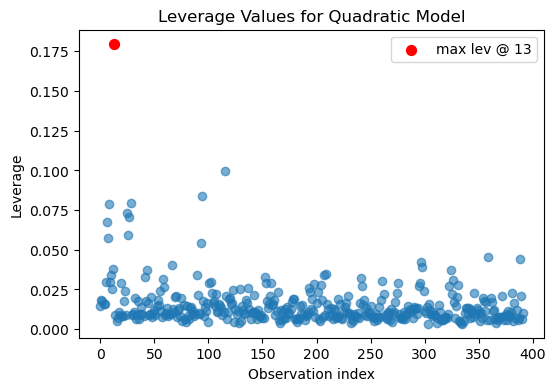

In [67]:
infl = model_poly.get_influence()
lev  = infl.hat_matrix_diag

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(np.arange(len(lev)), lev, alpha=0.6)
ax.set_xlabel("Observation index")
ax.set_ylabel("Leverage")
ax.set_title("Leverage Values for Quadratic Model")

imax = np.argmax(lev)
ax.scatter(imax, lev[imax], color='red', s=50, label=f"max lev @ {imax}")
ax.legend()

plt.show()

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifs = [variance_inflation_factor(Xp.values, i)
        for i in range(1, Xp.shape[1])]
vif_df = pd.DataFrame({
    'feature': Xp.columns[1:],
    'VIF': vifs
})

vif_df

,feature,VIF
0,horsepower,70.729220
1,horsepower^2,42.479702
2,weight,14.023330
3,acceleration,3.194004
4,displacement,11.365163
